## Lab 8: Sequence Alignment  
        be131-12@meowth:~$ spades -t 1 -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq --o ~/jess/Lab8

## Lab 9: Sequence Analysis  
### Generate assembly statistics  
Terminal commands:  

    be131-12@meowth:~/jess/Lab8$ assembly-stats contigs.fasta  
    stats for contigs.fasta  
    sum = 6678635, n = 176, ave = 37946.79, largest = 414008  
    N50 = 234690, n = 11  
    N60 = 202142, n = 14  
    N70 = 154232, n = 18  
    N80 = 103367, n = 23  
    N90 = 81286, n = 30  
    N100 = 128, n = 176  
    N_count = 0  
    Gaps = 0  

    be131-12@meowth:~/jess/Lab8$ assembly-stats scaffolds.fasta  
    stats for scaffolds.fasta  
    sum = 6678655, n = 174, ave = 38383.07, largest = 414008  
    N50 = 234690, n = 11  
    N60 = 202142, n = 14  
    N70 = 154232, n = 18  
    N80 = 103367, n = 23  
    N90 = 81821, n = 30  
    N100 = 128, n = 174  
    N_count = 20  
    Gaps = 2  
    
**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?**  
N50 is a useful statistic to calculate, especially if the contig/scaffold lengths come from a skewed distribution, which would bias the mean and to a lesser extent the median length. N50 does better than both mean and median contig length because it is essentially a weighted median (weighted by contig lengths.)

**In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?**  
The total length of scaffolds was marginally higher than the total length of contigs. The similar values of N50-N100 (almost identical except for N90) make sense because the largest few contigs/scaffolds were the same and were large compared to the rest of the contigs/scaffolds, so the N-statistics would likely be the same.

Extra Credit: The number of times a contig in your assembly was covered by the reads used to assemble it (“coverage”) is listed at the end of the contig name in contigs.fasta. Extract the coverage from each FASTA header and plot a histogram of coverage for all contigs in your assembly.  

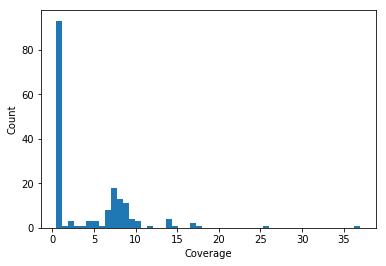

In [20]:
from Bio import SeqIO
import matplotlib.pyplot as plt
coverages = [float(record.id.split('_')[5]) for record in SeqIO.parse("contigs.fasta", "fasta")]
coverages.sort()

exclude = 2      # number of larger outliers to exclude from plot
plt.hist(coverages[:-exclude],50)
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.show()

**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?**  
After excluding large outliers, the distribution appears to be bimodal, as indicated by the presence of two peaks, with coverages that also fall at integer multiples of the mean of the more Gaussian mode (~7, coverages near 14, 28, 35)

**What explains the presence of contigs with coverage an integer multiple of the mean coverage?**  
The mean is not very representative if the distribution of contig lengths comes from a skewed distribution. Therefore contigs with coverages that are integer multiples of the mean coverage are bound to occur by coincidence.  

### Identify taxon from which genome originated  
Terminal commands:  

    be131-12@meowth:~$ rna_hmm3.py -i jess/Lab8/contigs.fasta -o jess/Lab8/output.gff

    be131-12@meowth:~/jess/Lab8$ head output.gff
    ##seq_name      method  feature start   end     evalue  strand  frame   attribute
    NODE_4_length_332509_cov_9.114046       rna_hmm3        rRNA    133603  136507  0NA       23S_rRNA
    NODE_23_length_103367_cov_10.081286     rna_hmm3        rRNA    37580   40484   0NA       23S_rRNA
    NODE_2_length_378948_cov_10.006665      rna_hmm3        rRNA    350549  353454  0NA       23S_rRNA
    NODE_18_length_154232_cov_9.584186      rna_hmm3        rRNA    126591  129495  0NA       23S_rRNA
    NODE_6_length_298784_cov_8.918606       rna_hmm3        rRNA    15975   18879   0NA       23S_rRNA
    NODE_5_length_327223_cov_9.241629       rna_hmm3        rRNA    48335   51239   0NA       23S_rRNA
    NODE_112_length_451_cov_1.006173        rna_hmm3        rRNA    184     303     7.7e-36   +       NA      23S_rRNA
    NODE_112_length_451_cov_1.006173        rna_hmm3        rRNA    152     220     4.3e-09   -       NA      23S_rRNA
    NODE_23_length_103367_cov_10.081286     rna_hmm3        rRNA    35531   37075   0NA       16S_rRNA  

    be131-12@meowth:~/jess/Lab8$ awk '{if($9~"16S_rRNA") print}' output.gff > output_16S_rRNA.gff  

    be131-12@meowth:~/jess/Lab8$ cat output_16S_rRNA.gff
    NODE_23_length_103367_cov_10.081286     rna_hmm3        rRNA    35531   37075   0NA       16S_rRNA
    NODE_18_length_154232_cov_9.584186      rna_hmm3        rRNA    124542  126086  0NA       16S_rRNA
    NODE_5_length_327223_cov_9.241629       rna_hmm3        rRNA    46286   47830   0NA       16S_rRNA
    NODE_6_length_298784_cov_8.918606       rna_hmm3        rRNA    13926   15470   0NA       16S_rRNA
    NODE_4_length_332509_cov_9.114046       rna_hmm3        rRNA    137012  138556  0NA       16S_rRNA
    NODE_2_length_378948_cov_10.006665      rna_hmm3        rRNA    348500  350044  0NA       16S_rRNA  
    
    be131-12@meowth:~/jess/Lab8$ bedtools getfasta -fi contigs.fasta -bed output_16S_rRNA.gff > bedoutput.fasta  

[RDP SeqMatch](http://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp;jsessionid=AAD9C9C52ECC7B35B37466F1E50DE53E.radiant)  
**You may not be able to obtain a “species”-level identification, but please write down your genus-level identification in your iPython notebook along with an explanation for how you came to this conclusion.**  
According to the results of RDP SeqMatch, each of the 16S reads matches to the genus *Pseudomonas*, but to different species. This is clear because the top 20 matches for each sequence all match to sequences from the same genus, Pseudomonas.  

### Genome Annotation  
[Bacterial Annotation System (BASys)](https://www.basys.ca/)  
>**Citation:**   
>[Van Domselaar GH, Stothard P, Shrivastava S, Cruz JA, Guo A, Dong X, Lu P, Szafron D, Greiner R, Wishart DS.BASys: a web server for automated bacterial genome annotation. Nucleic Acids Res. 2005 Jul 1;33(Web Server issue):W455-9.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1160269/)  



[RAST Server](http://rast.nmpdr.org/rast.cgi?page=Upload)  
>**Citations:**    
The RAST Server: Rapid Annotations using Subsystems Technology.  
Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, Edwards RA, Formsma K, Gerdes S, Glass EM, Kubal M, Meyer F, Olsen GJ, Olson R, Osterman AL, Overbeek RA, McNeil LK, Paarmann D, Paczian T, Parrello B, Pusch GD, Reich C, Stevens R, Vassieva O, Vonstein V, Wilke A, Zagnitko O.  
>
>BMC Genomics, 2008, [PubMed entry](https://www.ncbi.nlm.nih.gov/pubmed/18261238)  
>
>The SEED and the Rapid Annotation of microbial genomes using Subsystems Technology (RAST).  
Overbeek R, Olson R, Pusch GD, Olsen GJ, Davis JJ, Disz T, Edwards RA, Gerdes S, Parrello B, Shukla M, Vonstein V, Wattam AR, Xia F, Stevens R.  
>
>Nucleic Acids Res. 2014 [PubMed entry](https://www.ncbi.nlm.nih.gov/pubmed/?term=24293654)  
RASTtk: A modular and extensible implementation of the RAST algorithm for building custom annotation pipelines and annotating batches of genomes.  
>
>Brettin T, Davis JJ, Disz T, Edwards RA, Gerdes S, Olsen GJ, Olson R, Overbeek R, Parrello B, Pusch GD, Shukla M, Thomason JA, Stevens R, Vonstein V, Wattam AR, Xia F.  
Sci Rep., 2015, [PubMed entry](https://www.ncbi.nlm.nih.gov/pubmed/25666585)  


[BASys results](https://www.basys.ca/server3/basys/cache/3f767cbac6f990dc1d56ab58e2f7686c/maps/index.html)  
![BASys_image.JPG](BASys_image.JPG)  

[RAST results](http://rast.nmpdr.org/seedviewer.cgi?page=Organism&organism=6666666.379375)  
![RAST_image.JPG](RAST_image.JPG)  

**Is *Pseudomonas* a human pathogen?**

The genus *Pseudomonas* is well-documented and understood, especially in clinical manifestations. *Pseudomonas* species normally inhabit soil, water, and vegetation, and often colonize hospital food, sinks, taps, mops, and respiratory equipment that can spread to patients by contact or ingestion of contaminated food and water. According to the [4th edition of Medical Microbiology](https://www.ncbi.nlm.nih.gov/books/NBK8326/), *Pseudomonas* is known to cause opportunistic infections in the various forms including endocarditis, pneumonia, urinary tract, and central nervous system infections. The two main species of *Pseudomonas* responsible for such infections are *P. maltophilia* and *P. aeruginosa*, the latter of which is particularly serious for hospital patients with cancer, cystic fibrosis, and burns. While *P. aeruginosa* has several virulence factors, their role in pathogenesis are unclear. It is also known that all strains of *Pseudomonas* can synthesize endotoxins, which likely plays a role in the virulence of the genus. A literature review of *Pseudomonas* indicates that it is a known human pathogen.  

Looking at the results of two separate annotations of the *Pseudomonas* assembly obtained, the high-level subsystem statistics from RAST show 62 “Virulence, Disease, and Defense” features. Looking more closely at this subsystem, this includes genes for “resistance to antibiotics and toxic compounds” like copper, cobalt-zinc-cadmium, chromate, and Streptothricin, via efflux pumps for their respective compounds. Another feature of *Pseudomonas* is “invasion and intracellular resistance” via virulence operons involved in ribosomal protein synthesis and DNA transcription. Such operons would allow Pseudomonas to invade and interfere with DNA transcription in human host cells. This evidence, combined with the resistance of *Pseudomonas* to many known antibiotics, supports the fact that the bacterium is a known human pathogen.  

**References**  
>Iglewski BH. Pseudomonas. In: Baron S, editor. Medical Microbiology. 4th edition. Galveston (TX): University of Texas Medical Branch at Galveston; 1996. Chapter 27. Available from: https://www.ncbi.nlm.nih.gov/books/NBK8326/